> # FORMATION ACADÉMIQUE  <blockquote>ARDUINO NIVEAU 1

# Les documents des formations Arduino et Python

http://www.ac-bordeaux.fr/ puis se connecter à TRIBU

Pour se connecter à TRIBU, vous devez aller sur le portail **ARENA** de votre académie, vous connecter avec vos identifiants et mot de passe de messagerie. Puis cliquer sur **Formation et Ressources** puis le lien **Plate-forme collaborative : Tribu**

# La carte Arduino

<img src="images_1/arduino_carte_1.jpg" width = '500' height='500'>

# Le logiciel Arduino

<img src="images_1/led_test.png" width = '500' height='500'>

L'aide en ligne (API : interface de programmation applicative) : 
* L'officielle : https://www.arduino.cc/reference/en/
* En français : http://www.mon-club-elec.fr/pmwiki_reference_arduino/pmwiki.php?n=Main.Reference

## Notre premier programme Arduino

```C
void setup(){
    Serial.begin(9600); //Initialisation de la liaison série   
}

void loop(){
    Serial.println("coucou"); 
}
```

## Lire des valeurs sur une entrée analogique et transfert sur la liaison série

```C
void setup(){
    Serial.begin(9600);      //Initialisation de la liaison série à la vitesse de 9600 bauds   
}

void loop(){
    mesure = analogRead(0); //Lecture de l'information sur l'entrée analogique A0
    Serial.print(millis()); //Envoie de la valeur temps vers la liaison série (ou USB)
    Serial.print("\t");     //Envoie d'une tabulation : \t comme séparateur
    Serial.println(mesure); //Envoie de la mesure puis retour à la ligne
}
```

# L'application Jupyter Notebook

Utilisation du navigateur web pour produire des documents dans un **Notebook** contenant du **code python**, du texte avec sa mise ne forme grâce au **markdown** mais également des équations mathématiques avec $\LaTeX$

* **Des cellules de texte** dont la mise en forme est réalisée par un langage de balisage appelé **markdown**, pour un aperçu rapide on pourra consulter : https://fr.wikipedia.org/wiki/Markdown

* **Des mathématiques** dont la mise en forme est réalisée par un langage de balisage appelé $\LaTeX$, pour un aide mémoire des principales balises on pourra consulter : http://docs.wixstatic.com/ugd/bf8f20_557167febde14efb9d7844776396beb1.pdf) 

$$\boxed{\Large\sum \vec{F}_{ext} = m\vec{a}\ }$$

* Une **exportation du document** est possible dans différents formats : pdf, $\TeX$ ou HTML, grâce au menu : `File -> Download as`

# La connexion Arduino - Python

<img src="images_1/arduino_python.jpg" width = '500' height='500'>

Les modules Python

In [1]:
import os
import serial
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

Établir la communication entre Arduino et Python nécessite l'utilisation du module `serial`. Toutes les fonctionnalités liées à ce module seront donc préfixées par le nom du module. Il est en sera de même pour tout autre module.

**Attention : ** La vitesse de transfert des informations sur le port série ou USB doit être la même que celle d'Arduino, dans notre cas  : 9600 bauds

In [2]:
serial_port = serial.Serial(port = "/dev/ttyACM0", baudrate = "9600")

On peut maintenant transférer des informations de la carte Arduino vers Python et les afficher dans le notebook

In [4]:
print(serial_port.readline())

b'4110\t716\r\n'


**TRÈS IMPORTANT : Il ne faut pas oublier de fermer le port de communication** quand les mesures sont terminées. La connexion avec la carte Arduino peut être vue comme une conversation téléphonique. Si vous téléphonez à un copain, et qu'une autre personne vous appelle votre numéro sonne occupé. En général, il faut raccrocher pour engager une nouvelle conversation téléphonique. Avec la connexion Arduino il en est de même. Si le moniteur série est ouvert Python ne pourra communiquer avec la carte Arduino et inversement s'il existe une connexion Arduino-Python vous ne pourrez plus ouvrir un moniteur série ni même téléverser un programme vers la carte Arduino

In [5]:
serial_port.close() 

Pour répéter plusieurs fois une insruction ou un ensemble d'instructions, on utilise une **structure répétitive** 

In [6]:
for i in range(5):
    print("coucou")

coucou
coucou
coucou
coucou
coucou


Pour conserver l'information de manière temporaire on utilise la mémoire de l'ordinateur, dans notre cas nous allons utiliser des listes Python pour conserver les mesures. Dans l'exemple qui suit nous allons stocker les différentes valeurs de la variable `i`

In [7]:
liste = []          # une liste vide qui s'appelle liste
for i in range(5):
    liste.append(i)
print(liste)        # Affichage du contenu de la liste quand la boucle est terminée

[0, 1, 2, 3, 4]


**Question : ** Lire cinq mesures de tension envoyées par la carte Arduino et les stocker dans une liste `mesures`

In [9]:
serial_port = serial.Serial(port = "/dev/ttyACM0", baudrate = "9600")
mesures = []
for i in range(5):
    m = serial_port.readline()
    mesures.append(m)
print(mesures)
serial_port.close() 

[b'257963\t714\r\n', b'57974\t715\r\n', b'5\t715\r\n', b'57861\t716\r\n', b'57872\t714\r\n']


Il ne reste plus qu'à mettre en mémoire les informations reçues, mais avant cela une petite transformation s'impose. Nous avons vu que les informations reçues de la carte Arduino se présentent sous forme d'une ligne contenant : le temps, une tabulation et la mesure provenant du capteur analogique. Mais l'ennui est que ces informations arrivent sous la forme de chaîne de caractères (en fait ce n'est pas tout à fait vrai puisque c'est des `bytes` mais on ferra comme si...)

Nous allons commencer par séparer le temps et la mesure grâce à la fonction `split` qui va découper la chaine grâce à la tabulation et ranger les 2 valeurs dans une liste

In [10]:
mesure  = b'23\t651\r\n'  # exemple d'une mesure temps, tabulation, mesure
decoupe = mesure.split()
print(decoupe)

[b'23', b'651']


Pour accéder à chacune des valeurs il suffit maintenant d'indiquer entre crochets le numéro d'emplacement de la valeur désirée en n'oubliant pas que Python commence la numérotation des emplacements à zéro.

In [11]:
print(decoupe[0])
print(decoupe[1])

b'23'
b'651'


Le travail est pratiquement terminé il ne reste plus qu'à convertir les chaînes de caractères en valeurs numériques

In [12]:
t = float(decoupe[0])
m = float(decoupe[1])
print(t)
print(m)

23.0
651.0


**Question : ** Compléter la suite d'instructions ci-dessous en respectant les consignes suivantes:

1. Indiquer le nom de votre port série 
1. Initialiser deux listes vides que l'on appelera `mesures` et `temps`
1. Indiquer le nombre de mesures
1. Affecter à `valeurs` une ligne d'information provenant d'Arduino découpée
1. Affecter à `m` la valeur flottante (numérique) de la mesure
1. ajouter cette valeur à la liste des mesures
1. Fermer le port série

**Le nom du port série est indiqué en bas à droite de la fenêtre Arduino par exemple : COM11**

J'ai ajouté par rapport au jour de la formation (au vu des erreurs commises) dans le code ci-dessous deux instructions permettant d'obtenir : 

* l'arrêt de l'acquisition si vous commetez une erreur de nom de variable. Par exemple en ajoutant un capteur il sera nécessaire d'ajouter une liste de mesures et en cas de mauvaise utilisation des noms de variable vous serez averti
* le nombre d'acquisition qui n'est pas forcément celui fixé en cas d'erreur de conversion.

In [13]:
# connexion au port série
serial_port = serial.Serial(port = "/dev/ttyACM0", baudrate = 9600 ) # question 1

temps             = []                       # question 2
mesures           = []                       # question 2
erreur_conversion = 0

serial_port.flushInput()
nb_mesures = 1000                            # question 3
for i in range(nb_mesures):
    valeurs = serial_port.readline().split() # question 4
    try:
        t = float(valeurs[0])                # question 5 
        m = float(valeurs[1])                   
        temps.append(t)
        mesures.append(m)                    # question 6
    except NameError:
        print("Problème de nom de variable à corriger puis exécuter à nouveau la cellule")
        break
    except ValueError:
        erreur_conversion += 1
    except :
        pass
    
print("Nombre de valeurs retenues =", nb_mesures - erreur_conversion)
serial_port.close()                         # question 7

Nombre de valeurs retenues = 999


# Représentation graphique des données avec Python

## Le module `matplotlib.pyplot`

Rappelez-vous on avait dit que pour utiliser une fonction d'un module, il fallait la préfixer avec le nom de module. Dans le cas de *matplotlib.pyplot* le nom de module est pénible à écrire à chaque utilisation donc on le remplace par un petit nom `plt` que l'on appelle un **alias**

On commence par la liste des abscisses et des ordonnées

In [14]:
x = [1, 2, 3, 4, 5]
y = [10, 10, 5, 5, 9]

Puis on utilise la fonction *plot()* pour tracer les points et la fonction `show()` pour les afficher

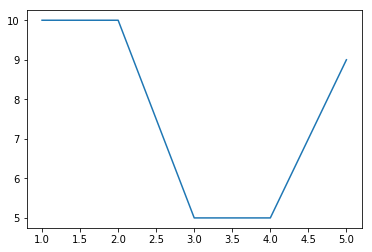

In [15]:
plt.plot(x,y)
plt.show()

**Question : ** Nous venons de voir que pour obtenir le graphe d'un ensemble de points il suffit d'avoir la liste des abscisses et la liste des ordonnées. Afficher les valeurs discrétisées de la série de mesures en tension en fonction du temps

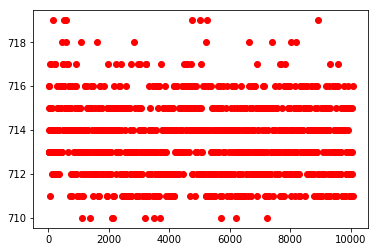

In [16]:
plt.plot(temps, mesures, 'or')
plt.show()

**Un histogramme**

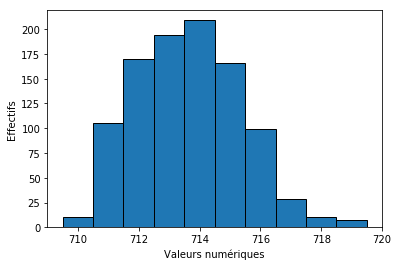

In [19]:
plt.hist(mesures, range = [709.5, 719.5], bins =10 , edgecolor = 'black' )
plt.xlabel("Valeurs numériques")
plt.ylabel("Effectifs")
plt.show()

## Discrétisation de l'information

Valeurs numériques obtenues pour des tensions dans l'intervalle $[0\,\mathrm{mV}; 50\,\mathrm{mV}]$  avec le CAN de la carte Arduino sur 10 bits. **Toutes les valeurs analogiques ne sont pas exactement représentables par des valeurs numériques.** Pour une valeur numérique nous avons une plage de valeurs analogiques qui va dépendre du **pas de résolution** du CAN, c'est à dire de la **précision** en bits du CAN. 

<img src="images_1/discretisation.png" width = '700' height='500'>

## Sauvegarder les données de l'acquisition dans un fichier CSV

Pour manipuler et analyser les données, le module panda (https://pandas.pydata.org/), développé pour Python, s'avère des plus pratique. En particulier, il permet la lecture et l'écriture de fichiers csv.

Il est maintenant important de pouvoir stocker l'information à long terme. L'installation du **Jupyter Notebook** sur le réseau pédagogique ne permet pas forcément à l'élève d'enregistrer l'information dans son répertoire personnel.

In [ ]:
print(os.getcwd())

**Attention** le chemin indiqué par `"U:"` est propre à Camille Jullian lieu de la formation. Il correspond à la racine du répertoire *perso* des élèves. Il convient donc d'adapter ce chemin en fonction de votre établissement.

In [ ]:
os.chdir("U:")

Une fois le chemin pour sauvegarder les données fixé. Dans un premier temps, il convient de créer un dataframe qui contient toutes les donneés tabulaires que l'on souhaite enregistrer. Dans notre cas, il s'agit des listes (tableaux) `temps` et `mesures`. La méthode DataFrame (http://pandas.pydata.org/pandas-docs/stable/dsintro.html#dataframe) assure cette opération. Elle reçoit en arguments les différentes listes précédées d'une intitulé de colonne. Dans notre exemple, nous intitulons 'Temps' et 'Mesures' les deux colonnes.

In [21]:
data = pd.DataFrame({
  "Temps"   : temps,
  "Mesures" : mesures
})
data.iloc[:5]

,Temps,Mesures
0,5.0,716.0
1,2176.0,716.0
2,2186.0,715.0
3,2196.0,715.0
4,2207.0,715.0


In [ ]:
filename = "tensions3_3V.csv"
data.to_csv(filename, sep=";", index = False, encoding="utf-8")

**Remarque : ** 

Pour ouvrir un fichier en *lecture* et charger les données dans la mémoire de l'ordinateur, nous utilisons la fonction `read_csv`du module `pandas`. Celle-ci reçoit plusieurs arguments parmi lesquels :
- le nom du fichier;
- une indication sur le séparateur des données : virgule `,`, point-virgule `;`, espace ` `, tabulation `\t`;
- une option précisant si la première ligne du fichier est une ligne d'entêtes ou une ligne de données.

In [ ]:
filename = "mesures.csv"
data     = pd.read_csv(filename, sep = ';')
data.head()

# Traitement statistique des données

### Moyenne et écart type

Nous avons dans le paragraphe précédent sauvegarder les données à l'aide du module `pandas` en utilisant une structure de données appelée `dataFrame` associée à la variable `data`. Il est maintenant tout à fait possible d'obtenir une étude statistique automatique avec la fonction `describe` (moyenne, écart type normalisé à N-1 et quantile).  

In [22]:
data.describe()

,Temps,Mesures
count,999.000000,999.000000
mean,4912.495495,713.636637
std,2955.374730,1.735258
min,5.000000,710.000000
25%,2285.000000,712.000000
50%,4880.000000,714.000000
75%,7475.000000,715.000000
max,10076.000000,719.000000


Si une seule de ces valeurs nous intéresse par exemple l'écart type (https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.std.html), nous pouvons écrire : 

In [23]:
data.mean()

Temps      4912.495495
Mesures     713.636637
dtype: float64

### Représentation graphique d'une fonction mathématique

Essayons de tracer la fonction $f : x \mapsto \sin(x)$ dans l'intervalle $[-2\pi, 2\pi]$

On commence par définir les paramètres nécessaires pour le tracé de la courbe représentative de $y$ en fonction de $x$.

In [ ]:
# intervalle de définition
x_min = -2*np.pi
x_max =  2*np.pi
# nombre de points
n     = 100

L'intervalle $[x_{min},x_{max}]$ est défini par un tableau de $n$ valeurs équiréparties à l'aide de la méthode `linspace` du module `numpy`.

In [ ]:
x = np.linspace(x_min, x_max, n)

La variable `x` est un tableau contenant des flottants. L'une des caractéristiques des tableaux numpy est qu'il est possible d'effectuer des opérations mathématiques *en bloc* sur le tableau. Ainsi `np.sin(x)` est un tableau qui contient autant de valeurs que `x` et dont les éléments sont tous les `sin(x[i])`, où `i` prend les valeurs de `0` à `n-1`.

In [ ]:
y = np.sin(x)

**Questions : ** 

1. Tracer le graphe de la fonction $f$
2. Tracer la loi normale (fonction $g$ ci-dessous) corespondante à la moyenne et écart type de vos mesures

$$g : x \mapsto \frac{1}{\sigma_x\sqrt{2\pi}}\,exp\left({\frac{-(x - \bar{x})^2}{2\sigma_x^2}}\right)\qquad\text{où }\bar{x} = \text{ moyenne et }\sigma_x = \text{ écart type}$$

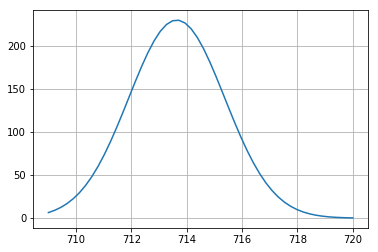

In [26]:
ecart_type = data.std()[1]
moyenne    = data.mean()[1]
A          = nb_mesures

#intervalle de définition
x = np.linspace(min(mesures) - 1, max(mesures) + 1)
#Calculer les images correspondantes avec la loi normale
y =  A/(ecart_type*np.sqrt(2*np.pi))*np.exp(-(x-moyenne)**2/(2*ecart_type**2))

plt.grid()
plt.plot(x, y)
plt.show()

**Histogramme et gaussienne sur le même graphique**

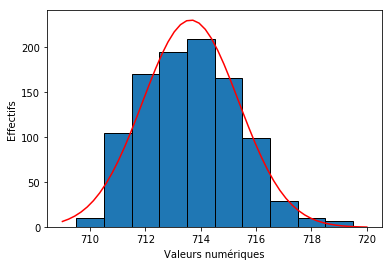

In [32]:
plt.hist(mesures, range = [709.5, 719.5], bins =10 , edgecolor = 'black' )
plt.plot(x, y, 'r')

plt.xlabel("Valeurs numériques")
plt.ylabel("Effectifs")
plt.show()